# Introduction
---
This notebook presents the temporal features used in the `wavely.signal` package.


## Setup

In [1]:
%load_ext nb_black
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from wavely.signal.features.features import FeaturesComputer
from wavely.signal.units.helpers import split_signal

<IPython.core.display.Javascript object>

## Test signal

We generate a signal with a duration of 1.2s, this latter has three components: sine, square and triangle. Each component lasts 0.4s.

In [2]:
rate = 96000
block_duration = 0.4
bloc_sample = int(block_duration * rate)
timestamps_per_signal = np.arange(0, bloc_sample) / rate  # s

sine = np.sin(2 * np.pi * 20 * timestamps_per_signal)
square = signal.square(2 * np.pi * 20 * timestamps_per_signal)
triangle = signal.sawtooth(2 * np.pi * 20 * timestamps_per_signal, 0.5)

samples = np.concatenate((sine, square, triangle), axis=0)
samples_number = samples.shape[-1]
timestamps = np.arange(0, samples_number) / rate  # s

<IPython.core.display.Javascript object>

The resulting signal has the following form:

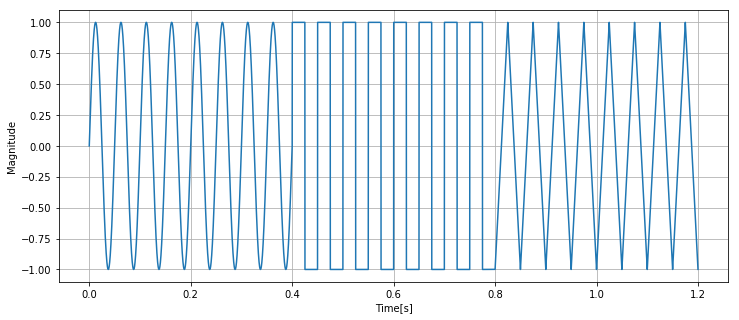

<IPython.core.display.Javascript object>

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(timestamps, samples)
plt.xlabel("Time[s]")
plt.ylabel("Magnitude")
plt.grid()

## Processing (multiple frames)

We split the previous signal into 3 equal frames of 0.4s. We then calculate using `FeaturesComputer` the following features: power, root mean square, crest factor and temporal kurtosis.

In [4]:
data_frames = split_signal(
    signal=samples, rate=rate, block_duration=block_duration
)

<IPython.core.display.Javascript object>

In [5]:
fc = FeaturesComputer(
    block_size=samples_number,
    rate=rate,
    features=["power", "rms", "crest_factor", "temporal_kurtosis"],
)
feats = fc.compute(data_frames)

<IPython.core.display.Javascript object>

Theoretically we find the following values:

|  Wave type |  RMS | Crest Factor (${|A|_{\mathrm {peak} } \over A_{\mathrm {rms} }}$)  |  Mean power ($\frac{1}{N}\sum\limits_{i=1}^{N} p_i$) |  Temporal kurtosis (${{\frac {\mu _{4}}{\sigma ^{4}}}}$)  |
|:---------------------------:|:---------------------------:|:---------------------------:|:---------------------------:|:---------------------------:|
|  Sine | $A_{max} \over \sqrt{2} \approx 0.7 $ |  $\sqrt{2} $  |  $1 \over 2$ | $3 \over 2$  |
| Square  | $A_{max} = 1 $  |  $1$ | $1$   |  $1$ |
|  Traingle |  $A_{max} \over \sqrt{3} \approx 0.57 $ |  $\sqrt{3} $ | $1 / 3$  | $\approx 1.8$  |


where :
+ $A_{\mathrm {max}}$ : max value, 
+ $A_{\mathrm {peak}}$: peak value, 
+ $A_{\mathrm {rms}}$: rms value,
+ $N$: number of samples,
+ $p_i$: i-th sample,
+ $\mu _{4}$: fourth central moment,
+ $\sigma ^{4}$: standard deviation 

## Feature plots

Let us plot the computed features for the 3 components of our signal.

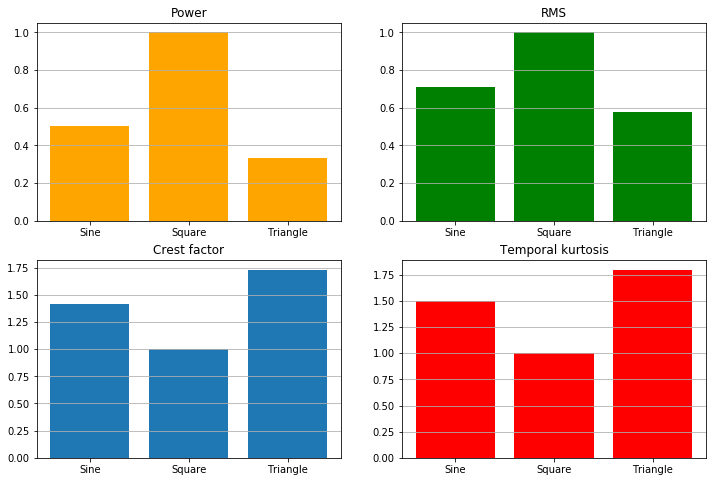

<IPython.core.display.Javascript object>

In [6]:
fig, axs = plt.subplots(2, 2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
poitions = np.arange(3)
labels = ["Sine", "Square", "Triangle"]
axs[0, 0].bar(poitions, feats["power"], color="orange")
axs[0, 0].set_xticks(poitions)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_title("Power")
axs[0, 0].yaxis.grid()

axs[0, 1].bar(poitions, feats["rms"], color="green")
axs[0, 1].set_title("RMS")
axs[0, 1].set_xticks(poitions)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].yaxis.grid()

axs[1, 0].bar(poitions, feats["crest_factor"])
axs[1, 0].set_xticks(poitions)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_title("Crest factor")
axs[1, 0].yaxis.grid()

axs[1, 1].bar(poitions, feats["temporal_kurtosis"], color="red")
axs[1, 1].set_title("Temporal kurtosis")
axs[1, 1].set_xticks(poitions)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].yaxis.grid()

Therefore the calculated values match the theoretical values.